In [1]:
!pip install --quiet tables

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from anndata import AnnData
import scanpy as sc
from scipy.sparse import csr_matrix

In [3]:
DATA_DIR = "/lustre/groups/ml01/workspace/dominik.klein/dominik.klein/neurips2022"

In [4]:
FP_MULTIOME_TRAIN_INPUTS = os.path.join(DATA_DIR,"train_multi_inputs.h5")
FP_MULTIOME_TRAIN_TARGETS = os.path.join(DATA_DIR,"train_multi_targets.h5")
FP_CELL_METADATA = os.path.join(DATA_DIR,"metadata.csv")

In [5]:
df_cell = pd.read_csv(FP_CELL_METADATA)
df_cell

,cell_id,day,donor,cell_type,technology
0,c2150f55becb,2,27678,HSC,citeseq
1,65b7edf8a4da,2,27678,HSC,citeseq
2,c1b26cb1057b,2,27678,EryP,citeseq
3,917168fa6f83,2,27678,NeuP,citeseq
4,2b29feeca86d,2,27678,EryP,citeseq
...,...,...,...,...,...
281523,96a60b026659,10,31800,hidden,multiome
281524,d493e546991e,10,31800,hidden,multiome
281525,05666c99aa48,10,31800,hidden,multiome
281526,121f946642b5,10,31800,hidden,multiome


In [6]:
df_cell_multi = df_cell[(df_cell.technology=="multiome") & (df_cell.cell_type != "hidden") & (df_cell.donor==31800)]

In [7]:
df_multi_train_x = pd.read_hdf(FP_MULTIOME_TRAIN_INPUTS)

In [8]:
df_multi_train_y = pd.read_hdf(FP_MULTIOME_TRAIN_TARGETS)

In [9]:
df_subsampled = df_cell_multi.sample(n=2000, random_state=0)

In [10]:
df_1 = df_multi_train_x[df_multi_train_x.index.isin(df_subsampled.cell_id)]

In [11]:
df_multi_train_x.head()

gene_id,GL000194.1:114519-115365,GL000194.1:55758-56597,GL000194.1:58217-58957,GL000194.1:59535-60431,GL000195.1:119766-120427,GL000195.1:120736-121603,GL000195.1:137437-138345,GL000195.1:15901-16653,GL000195.1:22357-23209,GL000195.1:23751-24619,...,chrY:7722278-7723128,chrY:7723971-7724880,chrY:7729854-7730772,chrY:7731785-7732664,chrY:7810142-7811040,chrY:7814107-7815018,chrY:7818751-7819626,chrY:7836768-7837671,chrY:7869454-7870371,chrY:7873814-7874709
cell_id,,,,,,,,,,,,,,,,,,,,,
56390cf1b95e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.428336,0.0,0.0,0.0,0.0
fc0c60183c33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
9b4a87e22ad0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
81cccad8cd81,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
15cb3d85c232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [12]:
df_2 = df_multi_train_y[df_multi_train_y.index.isin(df_subsampled.cell_id)]

In [13]:
list(df_1.index) == list(df_2.index)

True

In [14]:
df_subsampled.set_index("cell_id", inplace=True)

In [15]:
df_subsampled_ordered = df_subsampled.reindex(list(df_1.index))

In [16]:
adata = AnnData(csr_matrix(df_2), obs=df_subsampled_ordered)

In [17]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

In [18]:
adata_peaks = AnnData(csr_matrix(df_2), obs=df_subsampled_ordered)

In [19]:
print(adata_peaks.shape)
min_cells = int(adata_peaks.shape[0] * 0.05)
sc.pp.filter_genes(adata_peaks, min_cells=min_cells)
print(adata_peaks.shape)

(2000, 23418)
(2000, 11607)


In [20]:
adata.obsm["peaks"] = adata_peaks.X

In [21]:
adata

AnnData object with n_obs × n_vars = 2000 × 20637
    obs: 'day', 'donor', 'cell_type', 'technology', 'n_genes'
    var: 'n_cells'
    obsm: 'peaks'

In [22]:
sc.pp.highly_variable_genes(adata, subset=True, flavor="seurat", n_top_genes=2000)

In [23]:
sc.pp.neighbors(adata)

         Falling back to preprocessing with `sc.pp.pca` and default params.


OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [24]:
sc.tl.umap(adata)

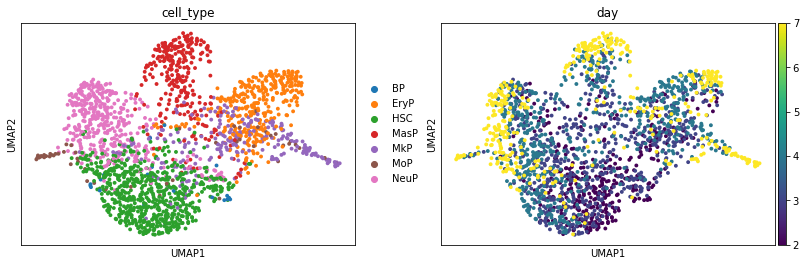

In [25]:
sc.pl.umap(adata, color=['cell_type', 'day'])

In [26]:
adata.obsm["peaks"]

<2000x11607 sparse matrix of type '<class 'numpy.float32'>'
	with 7411496 stored elements in Compressed Sparse Row format>

In [27]:
sc.pp.neighbors(adata, use_rep="peaks")

In [28]:
sc.tl.umap(adata)

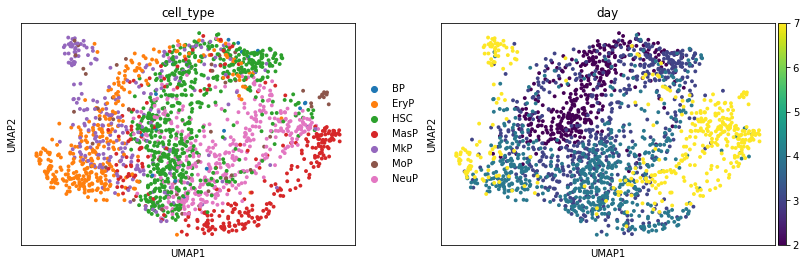

In [29]:
sc.pl.umap(adata, color=['cell_type', 'day'])

In [30]:
# put RNA neighbor / umap as default

In [31]:
sc.pp.neighbors(adata)

In [32]:
sc.tl.umap(adata)

In [33]:
adata.write("/lustre/groups/ml01/workspace/dominik.klein/dominik.klein/neurips2022/adata_neurips2022.h5ad")